❤️ `Heart Disease` Prediction Model
🧠 Project Overview
Heart disease remains one of the leading causes of death globally. Early diagnosis can significantly improve outcomes and reduce risk through lifestyle changes and medical interventions.

This machine learning project uses a Random Forest Classifier trained on clinical data to predict whether a patient is likely to develop heart disease. It is designed to assist healthcare professionals and researchers in making quick and informed decisions.



	Age of the patient	➤ Risk increases significantly with age. Aging leads to stiffening of arteries, plaque buildup, and declining cardiac function. Older individuals are more prone to hypertension, atherosclerosis, and arrhythmias.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import pickle
from sklearn.tree import DecisionTreeClassifier


In [27]:
df = pd.read_csv(r'C:\Users\USER\Desktop\PDF\cleaned_merged_heart_dataset.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
1884,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
1885,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
1886,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


In [28]:
df.shape


(1888, 14)

In [29]:
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [31]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,54.473422,0.684385,1.961794,131.637874,248.450166,0.151163,0.744186,149.270764,0.337209,1.073256,1.473422,0.707641,3.387043,0.485050
std,9.039576,0.465147,1.486557,17.509164,51.552293,0.358505,0.812347,23.122436,0.473150,1.156289,0.624080,0.982835,1.827329,0.500192
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,244.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.750000,0.000000,1.000000,165.750000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


In [32]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 602 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       602 non-null    int64  
 1   sex       602 non-null    int64  
 2   cp        602 non-null    int64  
 3   trestbps  602 non-null    int64  
 4   chol      602 non-null    int64  
 5   fbs       602 non-null    int64  
 6   restecg   602 non-null    int64  
 7   thalachh  602 non-null    int64  
 8   exang     602 non-null    int64  
 9   oldpeak   602 non-null    float64
 10  slope     602 non-null    int64  
 11  ca        602 non-null    int64  
 12  thal      602 non-null    int64  
 13  target    602 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 70.5 KB


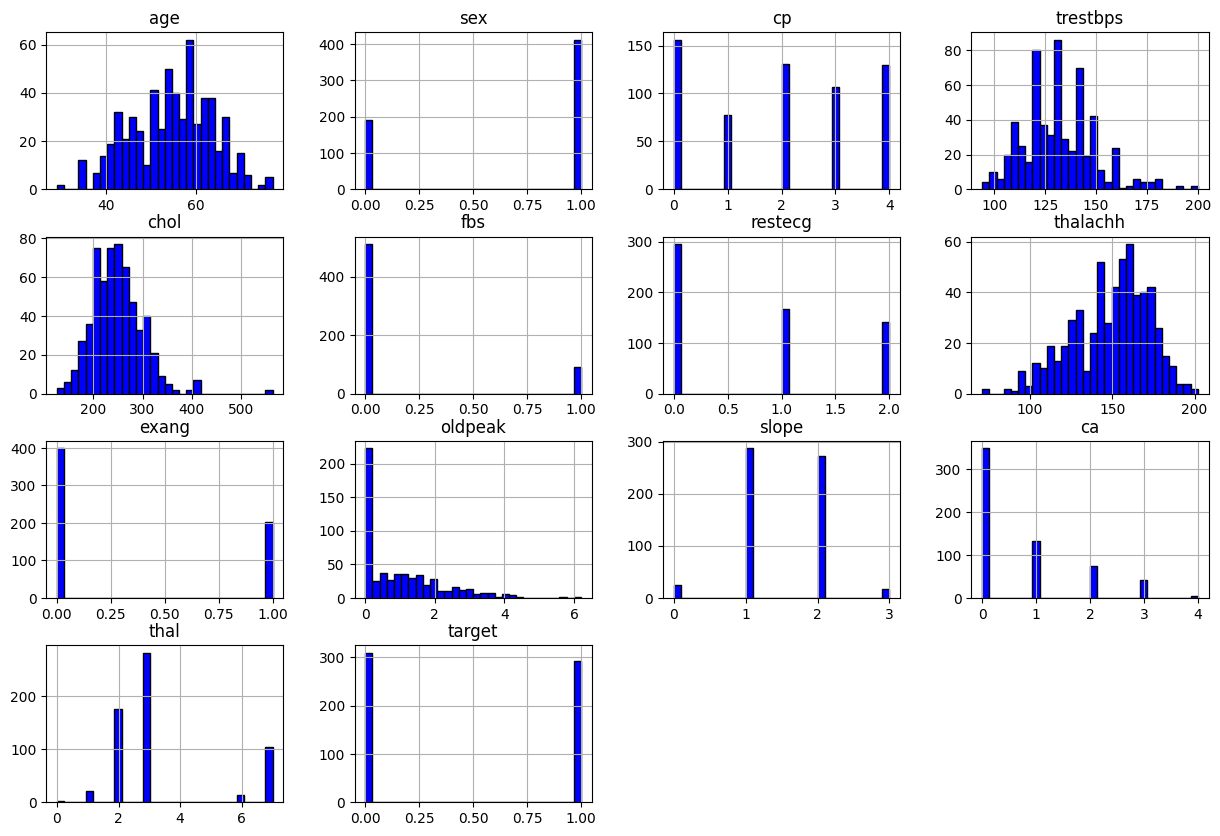

In [34]:
df.hist(figsize=(15, 10), bins=30, color='blue', edgecolor='black');


	Sex (1 = male, 0 = female)	➤ Males generally have a higher risk of heart disease earlier in life. Hormonal protection in pre-menopausal women (e.g., estrogen) reduces risk. However, post-menopause, the risk in women increases and can surpass that in men.

target    0    1
sex             
0        96   94
1       214  198


([<matplotlib.axis.XTick at 0x18f13ee4b30>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

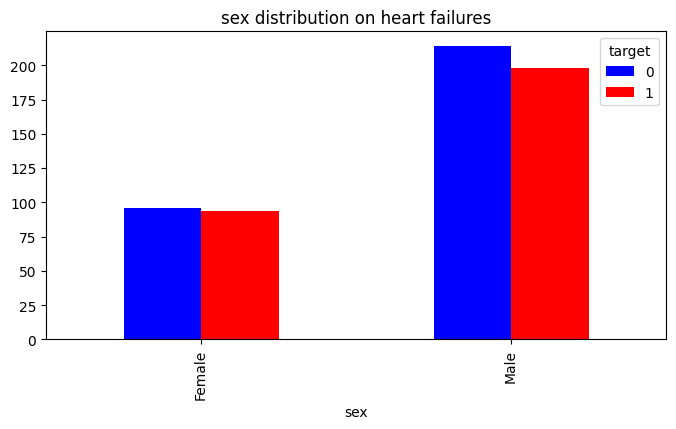

In [35]:
df_sex = pd.crosstab(df['sex'], df['target'])
print(df_sex)
df_sex.plot(kind='bar', figsize=(8,4),color = ['blue', 'red'], title = 'sex distribution on heart failures')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])


`Chest pain type (0–3)	➤ Indicates the nature of chest pain:
0 = typical angina,
1 = atypical angina,
2 = non-anginal pain,
3 = asymptomatic.
4 = angina equivalents
Typical angina (0) is strongly associated with blocked coronary arteries. Asymptomatic patients (3) are more concerning as silent ischemia can go unnoticed.`

target    0   1
cp             
0       114  42
1        31  47
2        55  76
3        72  35
4        38  92


Text(0.5, 0, 'Chest Pain Type (0-4)')

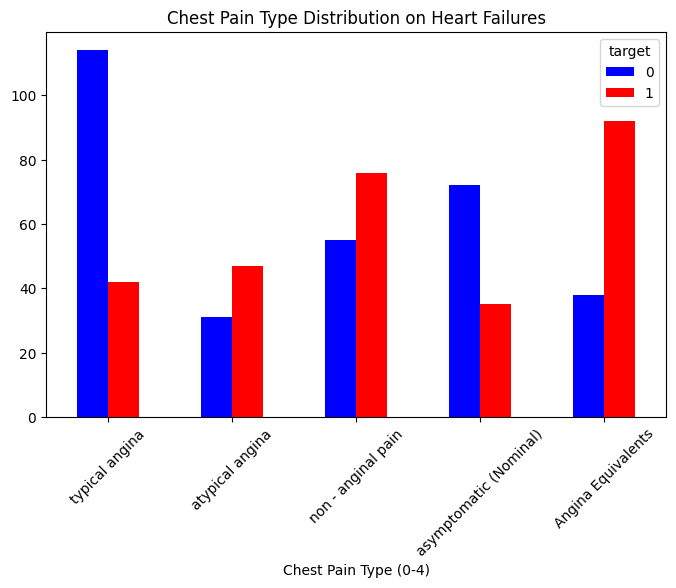

In [36]:
df_cp = pd.crosstab(df['cp'], df['target'])
print(df_cp)
df_cp.plot(kind='bar', figsize = (8, 5), color = ['blue', 'red'],title='Chest Pain Type Distribution on Heart Failures')
plt.xticks(ticks=[0, 1, 2, 3, 4],
           labels=['typical angina', 'atypical angina', 'non - anginal pain', 'asymptomatic (Nominal)', 'Angina Equivalents'], rotation=45),
plt.xlabel('Chest Pain Type (0-4)')


	Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)	➤ Elevated fasting glucose is a marker of diabetes or insulin resistance, both of which significantly increase the risk of heart disease through blood vessel damage and inflammation.

target    0    1
fbs             
0       261  250
1        49   42


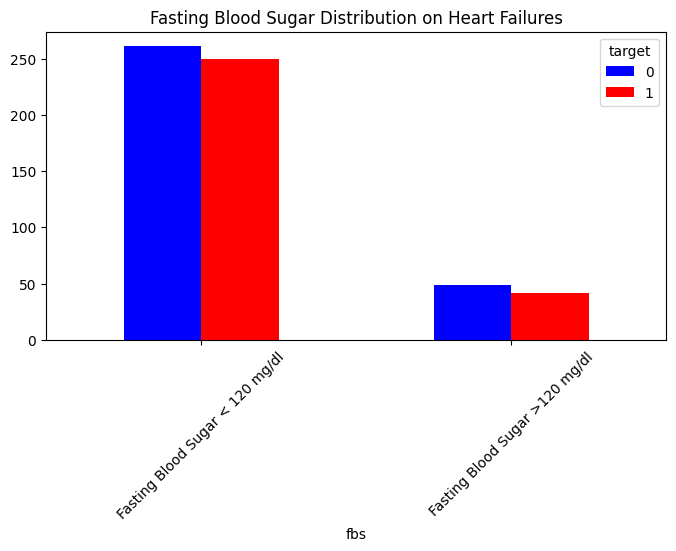

In [37]:
df_fbs = pd.crosstab(df['fbs'], df['target'])
print(df_fbs)
df_fbs.plot(kind='bar', figsize=(8, 4),color = ['blue', 'red'], title='Fasting Blood Sugar Distribution on Heart Failures')
plt.xticks(ticks=[0, 1], labels=['Fasting Blood Sugar < 120 mg/dl', 'Fasting Blood Sugar >120 mg/dl'], rotation=45);


`Resting electrocardiographic results (0–2)	➤ Abnormal ECG results (0 = Normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy) often indicate past cardiac events or heart muscle strain. These are key indicators of underlying heart issues.`

target     0    1
restecg          
0        178  117
1         65  101
2         67   74


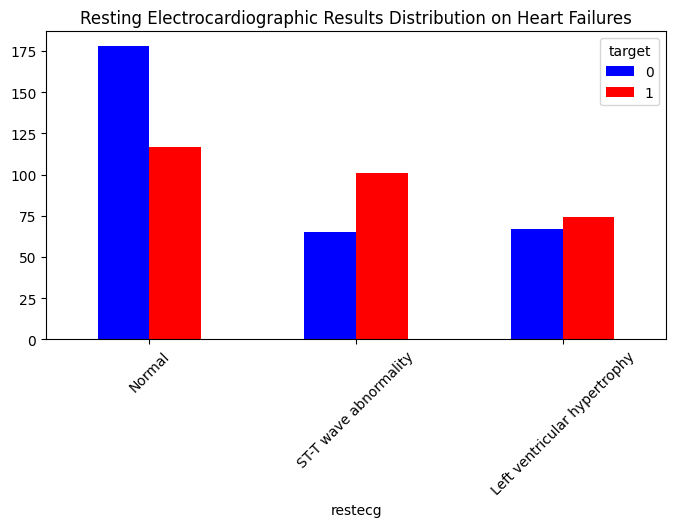

In [38]:
df_restecg = pd.crosstab(df['restecg'], df['target'])
print(df_restecg)
df_restecg.plot(kind='bar', figsize=(8, 4), color=['blue', 'red'], title='Resting Electrocardiographic Results Distribution on Heart Failures')
plt.xticks(ticks=[0, 1, 2],
           labels=['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'], rotation=45);


`Exercise-induced angina (1 = yes, 0 = no)	➤ Angina during physical exertion is a clear sign of ischemic heart disease. It implies that the heart is not getting enough blood during stress.`

target    0    1
exang           
0       198  201
1       112   91


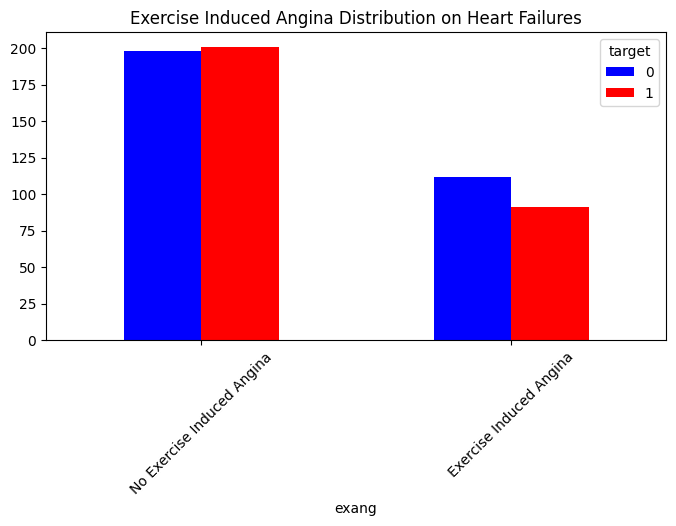

In [39]:
df_exang = pd.crosstab(df['exang'], df['target'])
print(df_exang)
df_exang.plot(kind='bar', figsize=(8, 4), color=['blue', 'red'], title='Exercise Induced Angina Distribution on Heart Failures')
plt.xticks(ticks=[0, 1], labels=['No Exercise Induced Angina', 'Exercise Induced Angina'], rotation=45);


	Slope of peak ST segment during ECG	➤ 0 = upslopping, 1 = flat, 2 = downsloping, 3 =normal.
Downsloping or flat ST segments often suggest heart strain or ischemia. Upsloping is considered more benign.

target    0    1
slope           
0        13   11
1       205   82
2        84  189
3         8   10


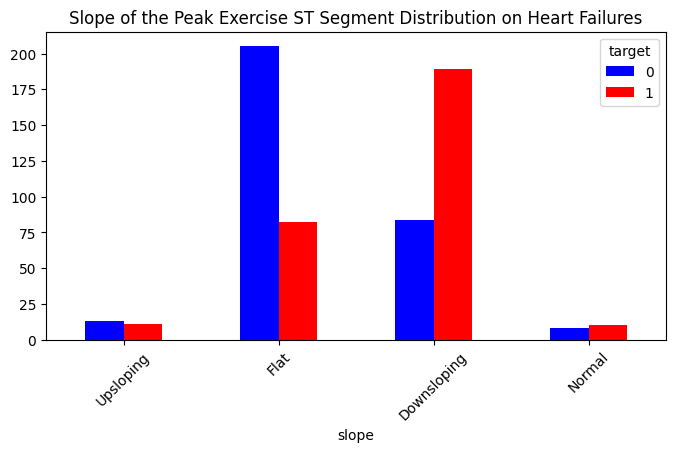

In [40]:
df_slope = pd.crosstab(df['slope'], df['target'])
print(df_slope)
df_slope.plot(kind='bar', figsize=(8, 4), color=['blue', 'red'], title='Slope of the Peak Exercise ST Segment Distribution on Heart Failures')
plt.xticks(ticks=[0, 1, 2, 3],
           labels=['Upsloping', 'Flat', 'Downsloping', 'Normal'], rotation=45);


	Number of major vessels colored by fluoroscopy (0–4)	➤ More vessels with blockage or narrowing increase the risk of heart attacks and failure. This is one of the most strongly predictive features in heart disease models.

target    0    1
ca              
0       170  178
1        74   59
2        42   33
3        22   19
4         2    3


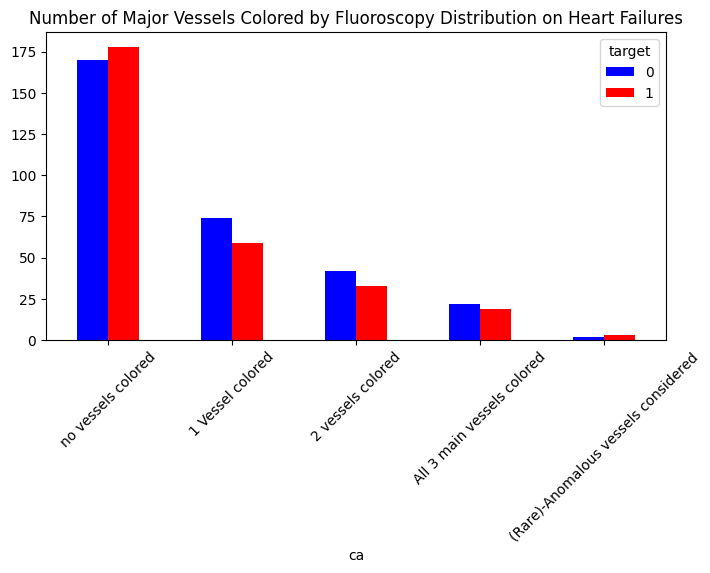

In [41]:
df_ca = pd.crosstab(df['ca'], df['target'])
print(df_ca)
df_ca.plot(kind='bar', figsize=(8, 4), color=['blue', 'red'], title='Number of Major Vessels Colored by Fluoroscopy Distribution on Heart Failures')
plt.xticks(ticks=[0, 1, 2, 3, 4],
           labels=['no vessels colored', '1 Vessel colored', '2 vessels colored', 'All 3 main vessels colored', '(Rare)-Anomalous vessels considered'], rotation=45);


	Thalassemia or stress test results (1 = normal, 2 = fixed defect, 3 = reversible defect)	➤ A fixed defect indicates permanent damage (e.g., old heart attack). A reversible defect suggests ischemia during stress. Both are serious indicator

target    0    1
thal            
0         2    1
1        14    8
2        42  134
3       221   61
6         6    8
7        25   80


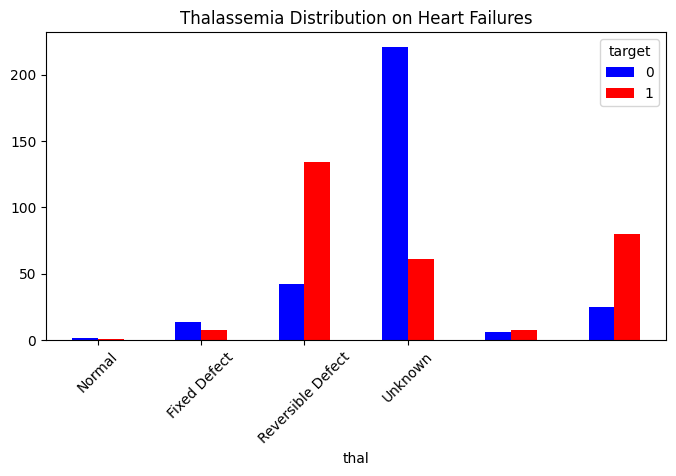

In [42]:
df_thal = pd.crosstab(df['thal'], df['target'])
print(df_thal)
df_thal.plot(kind='bar', figsize=(8, 4), color=['blue', 'red'], title='Thalassemia Distribution on Heart Failures')
plt.xticks(ticks=[0, 1, 2, 3],
           labels=['Normal', 'Fixed Defect', 'Reversible Defect', 'Unknown'], rotation=45);


	Heart disease diagnosis (1 = present, 0 = not present)	➤ This is the label or outcome we're trying to predict. A value of 1 means the patient

([<matplotlib.axis.XTick at 0x18f13d57ec0>,
 [Text(0, 0, 'No Heart Failure'), Text(1, 0, 'Heart Failure')])

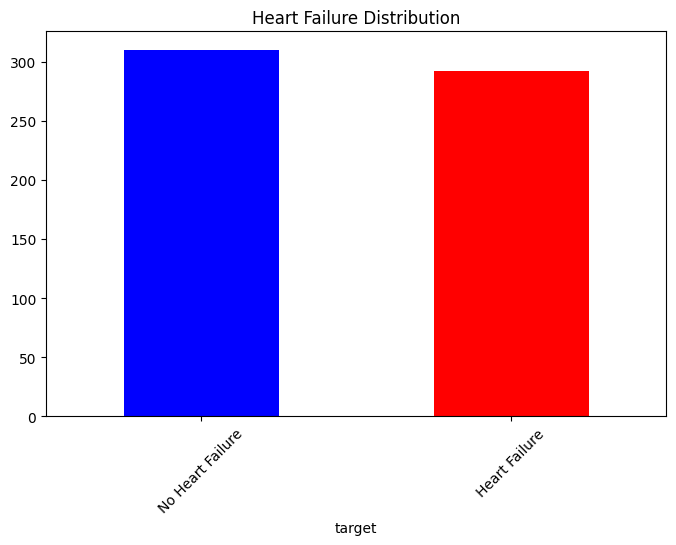

In [43]:
df['target'].value_counts().plot(kind='bar', color = ['blue', 'red'],figsize=(8, 5))
plt.title('Heart Failure Distribution')
plt.xticks(ticks=[0, 1], labels=['No Heart Failure', 'Heart Failure'], rotation=45)


**CORRELATION MATRIX**

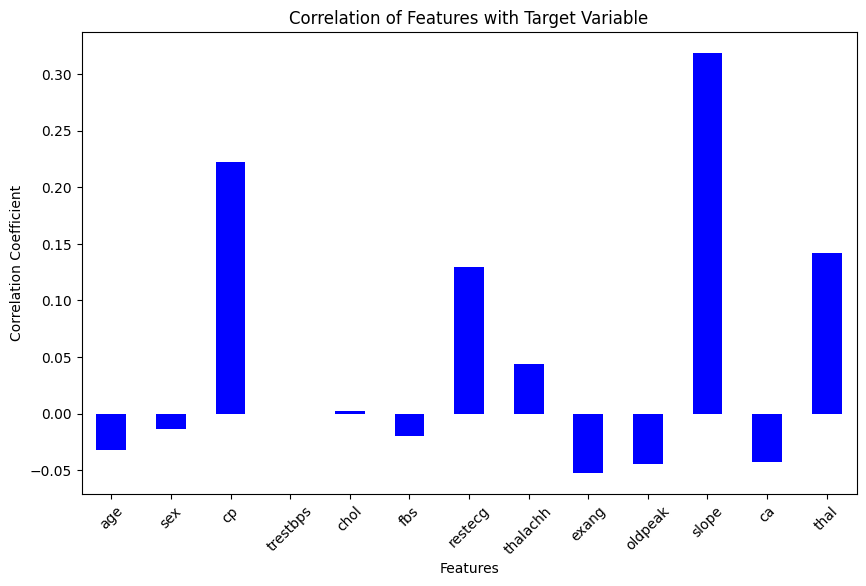

In [44]:
correlation = df.drop('target', axis=1).corrwith(df['target'])
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar', color='blue')
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


<Axes: >

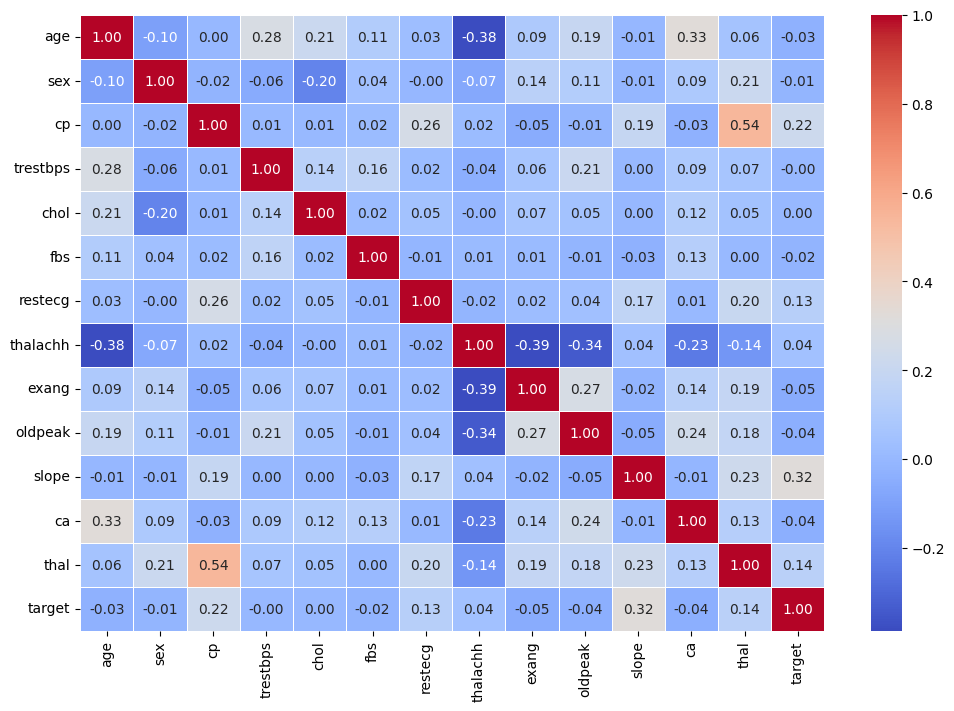

In [45]:
dcorr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(dcorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


**MODEL BUILDING   USING LOGISTIC REGRESSION**

In [46]:
X = df.drop('target', axis=1)    # predicting features
y = df['target']    # target variable


# scaling the features
standardscaler = StandardScaler()    # standard sacler for scaling
X_scaled = standardscaler.fit_transform(X)    # fitting the features into standard scaler

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)   # splitting the data

logistic_model = LogisticRegression(random_state=42)   # logistic model


# Hyperparameter tuning for Logistic Regression
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
logistic_model = GridSearchCV(logistic_model, param_grid_logistic, cv=5, scoring='accuracy', n_jobs=-1)    


logistic_model.fit(X_train, y_train)  # fitting the model
 
y_pred_logistic = logistic_model.predict(X_test)   # predicting the test set

acc_train = logistic_model.score(X_train, y_train)     # train accuracy
acc_test = logistic_model.score(X_test, y_test)      # test accuracy

print(f"Logistic Regression - Train Accuracy: {acc_train:.2f}")
print(f"Logistic Regression - Test Accuracy: {acc_test:.2f}")

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)     # accuracy score
roc_auc_logistic = roc_auc_score(y_test, y_pred_logistic)  # roc_auc score
precision_logistic = precision_score(y_test, y_pred_logistic)   # precision score
recall_logistic = recall_score(y_test, y_pred_logistic)    # recall score
f1_logistic = f1_score(y_test, y_pred_logistic)   # fi score

print(f"Logistic Regression - Accuracy: {accuracy_logistic:.2f}")
print(f"Logistic Regression - ROC AUC: {roc_auc_logistic:.2f}")
print(f"Logistic Regression - Precision: {precision_logistic:.2f}")
print(f"Logistic Regression - Recall: {recall_logistic:.2f}")
print(f"Logistic Regression - F1 Score: {f1_logistic:.2f}")


Logistic Regression - Train Accuracy: 0.71
Logistic Regression - Test Accuracy: 0.68
Logistic Regression - Accuracy: 0.68
Logistic Regression - ROC AUC: 0.68
Logistic Regression - Precision: 0.66
Logistic Regression - Recall: 0.72
Logistic Regression - F1 Score: 0.69


**DECISION TREE MODEL**

Decision Tree - Train Accuracy: 0.87
Decision Tree - Test Accuracy: 0.74
Decision Tree - Accuracy: 0.74
Decision Tree - ROC AUC: 0.74
Decision Tree - Precision: 0.73
Decision Tree - Recall: 0.73
Decision Tree - F1 Score: 0.73


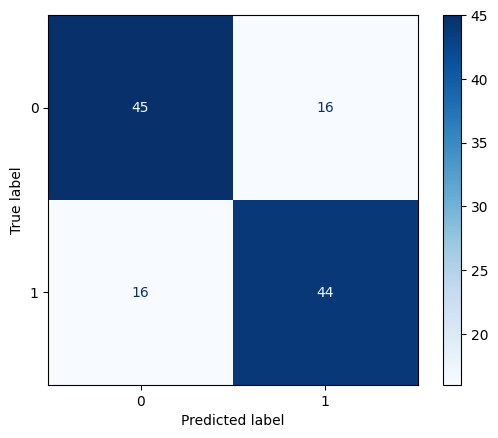

In [48]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
# Hyperparameter tuning for Decision Tree
param_grid_tree = {
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
standardscaler = StandardScaler()  # stadard scaler
X_scaled = standardscaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)


decision_tree_model = GridSearchCV(decision_tree_model, param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
acc_train_tree = decision_tree_model.score(X_train, y_train)
acc_test_tree = decision_tree_model.score(X_test, y_test)

print(f"Decision Tree - Train Accuracy: {acc_train_tree:.2f}")
print(f"Decision Tree - Test Accuracy: {acc_test_tree:.2f}")

accuracy_tree = accuracy_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
print(f"Decision Tree - Accuracy: {accuracy_tree:.2f}")
print(f"Decision Tree - ROC AUC: {roc_auc_tree:.2f}")
print(f"Decision Tree - Precision: {precision_tree:.2f}")
print(f"Decision Tree - Recall: {recall_tree:.2f}")
print(f"Decision Tree - F1 Score: {f1_tree:.2f}")
confusion_matrix_tree = ConfusionMatrixDisplay.from_estimator(decision_tree_model, X_test, y_test, cmap='Blues')


**XGB CLASSIFIER MODEL WITH HYPERPARAMETER TUNNING**

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

XGBoost Classifier - Cross-Validation Scores: [0.85950413 0.69421488 0.80833333 0.66666667 0.80833333]
XGBoost Classifier - Train Accuracy: 0.87
XGBoost Classifier - Test Accuracy: 0.73
XGBoost Classifier - Accuracy: 0.73, ROC AUC: 0.73, Precision: 0.70, Recall: 0.78, F1 Score: 0.74


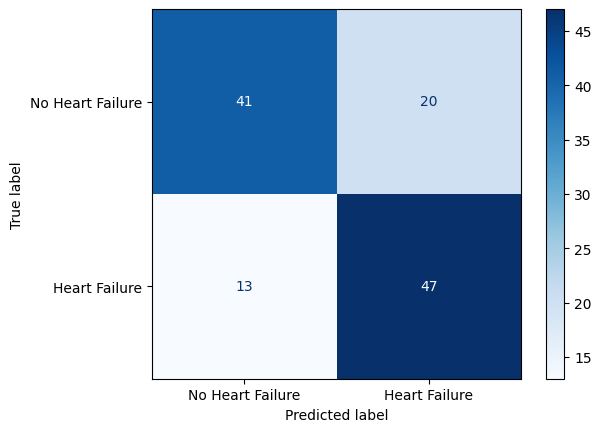

In [49]:
standardscaler = StandardScaler()
X_scaled = standardscaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.set_params(
    n_estimators=150,
    max_depth=40,
    min_child_weight=12,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.5,
    )

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print(f"XGBoost Classifier - Cross-Validation Scores: {scores}")

train_acc = xgb_model.score(X_train, y_train)
test_acc = xgb_model.score(X_test, y_test)
print(f"XGBoost Classifier - Train Accuracy: {train_acc:.2f}")
print(f"XGBoost Classifier - Test Accuracy: {test_acc:.2f}")

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier - Accuracy: {accuracy_xgb:.2f}, ROC AUC: {roc_auc_xgb:.2f}, Precision: {precision_xgb:.2f}, Recall: {recall_xgb:.2f}, F1 Score: {f1_xgb:.2f}")
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap=plt.cm.Blues, display_labels=['No Heart Failure', 'Heart Failure'])


**RANDOM FOREST CLASSIFIER WITH HYPER PARAMETER TUNNING**

Random Forest Classifier - Cross-Validation Scores: [0.81818182 0.73553719 0.80833333 0.73333333 0.75833333]
Random Forest Classifier - Train Accuracy: 0.89
Random Forest Classifier - Test Accuracy: 0.76
Random Forest Classifier - Accuracy: 0.76, ROC AUC: 0.76, Precision: 0.75, Recall: 0.78, F1 Score: 0.76


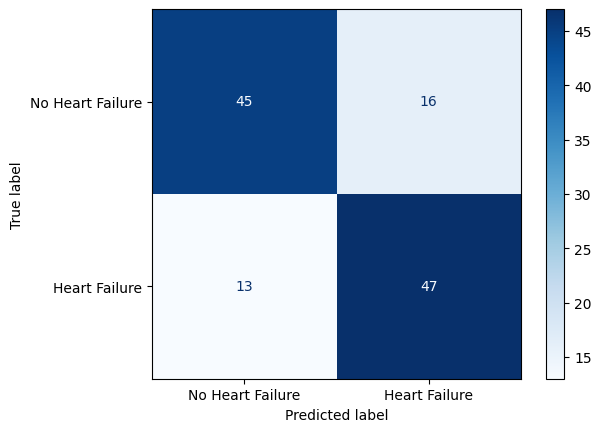

In [50]:
rf_model = RandomForestClassifier(
    n_estimators=3400,
    max_depth=70,
    min_samples_split=5,
    min_samples_leaf=11,
    random_state=42
)



standardscaler = StandardScaler()
X_scaled = standardscaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)


rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)



scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Random Forest Classifier - Cross-Validation Scores: {scores}")

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)
print(f"Random Forest Classifier - Train Accuracy: {train_acc:.2f}")
print(f"Random Forest Classifier - Test Accuracy: {test_acc:.2f}")

print(f"Random Forest Classifier - Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap=plt.cm.Blues, display_labels=['No Heart Failure', 'Heart Failure'])


**SAVING THE MODEL**

In [51]:
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
